# Intialize

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time




# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf) Table 2
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators.
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

# 'k_pivot': 0.05,
# 'N_ncdm': 1,
# 'N_ur': 2.0328,
# 'm_ncdm': 0.06    

}



font = {'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

# # a simple conversion from cl's to dl's
# def l_to_dl(lp):
#     return lp*(lp+1.)/2./np.pi

2024-03-12 12:53:18.990019: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-03-12 12:53:18.990043: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-12 12:53:18.990048: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-12 12:53:18.990081: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-12 12:53:18.990102: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
%%time 
M = Class()
M.set(cosmo_params)
M.set({
'output':'tSZ_1h,isw_tsz',
'ell_min': 2.
})
M.compute()

CPU times: user 37.6 s, sys: 65.1 ms, total: 37.7 s
Wall time: 4.4 s


[]

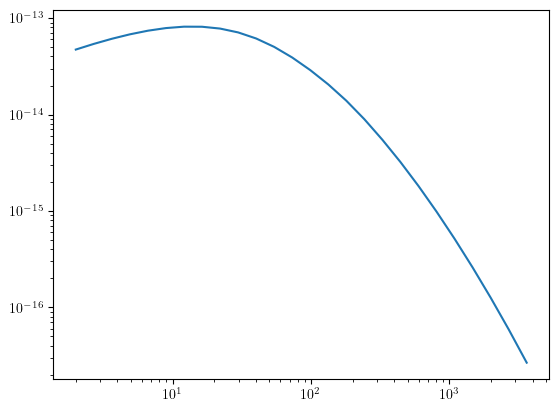

In [10]:
plt.plot(M.dl_isw_sz()['ell'],M.dl_isw_sz()['d_ell'])
plt.loglog()